In [98]:
import os
import pathlib
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt





In [90]:
def distance(city, stations):
    get_distance_func = np.vectorize(get_distance)
    distances = get_distance_func(city['latitude'], city['longitude'], stations['latitude'], stations['longitude'])
    return distances
    
def best_tmax(city, stations):
    distances = distance(city, stations)
    index = np.argmin(distances)
    return stations._get_value(index, 'avg_tmax')
    



# Haversine Code
# Author: Salvador Dali
# Date: Feb 7, 2014
# URL: https://stackoverflow.com/questions/27928/calculate-distance-between-two-latitude-longitude-points-haversine-formula/21623206
def get_distance(lat1, lon1, lat2, lon2):
    p = pi/180
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p) * cos(lat2*p) * (1-cos((lon2-lon1)*p))/2
    return 1000 * 12742 * asin(sqrt(a)) #2*R*asin...


In [91]:
stations = pd.read_json('stations.json.gz', lines=True)
stations['avg_tmax'] = stations['avg_tmax']/10
stations

,observations,avg_tmax,station,latitude,longitude,elevation
0,300,10.201667,CA001092970,54.4500,-124.2833,691.0
1,320,13.930937,CA003030529,50.0333,-113.2167,967.0
2,273,12.355311,CA004038116,49.0000,-108.3833,902.0
3,220,14.597727,CA007016840,46.5833,-72.2333,16.0
4,326,21.910429,USC00033466,34.5128,-93.0486,190.8
...,...,...,...,...,...,...
9414,366,15.477049,USW00024130,44.8428,-117.8086,1024.4
9415,366,15.690164,USW00054756,42.5700,-72.2911,169.2
9416,366,15.534699,USW00054791,43.2781,-70.9222,98.5
9417,352,18.325852,USW00093786,38.3083,-75.1239,3.7


In [92]:
city = pd.read_csv('city_data.csv')
city = city.dropna()
city['area'] = city['area']/1000000
city = city[city['area']<=10000]
city['population_density'] = city['population']/(city['area'])
city


,name,population,area,latitude,longitude,population_density
2,Calgary,1096833.0,825.290000,51.054444,-114.066944,1329.027372
6,Edmonton,812201.0,684.370000,53.500000,-113.500000,1186.786387
18,Abbotsford,133497.0,375.550000,49.054611,-122.328000,355.470643
20,Burnaby,223218.0,90.610000,49.250000,-122.949167,2463.502925
42,Nanaimo,83811.0,91.000000,49.164167,-123.936389,921.000000
...,...,...,...,...,...,...
663,Vista,93834.0,48.377000,33.193611,-117.241111,1939.640738
664,Renton,90927.0,60.970000,47.486667,-122.195278,1491.340003
665,San Angelo,93200.0,150.900000,31.450000,-100.450000,617.627568
667,San Juan,355074.0,199.429084,18.450000,-66.066667,1780.452444


In [93]:
get_distance_func = np.vectorize(get_distance)
distances = get_distance_func(city._get_value(6, 'latitude'), city._get_value(6, 'longitude'), stations['latitude'], stations['longitude'])

In [100]:
stations['distance'] = distances
stations.loc[stations['distance'] == distances.min()]
# index = np.argmin(distance)

,observations,avg_tmax,station,latitude,longitude,elevation,distance
2145,361,11.098338,CA00301FFNJ,53.5167,-113.5333,668.0,2880.520423


In [101]:
stations._get_value(index, 'avg_tmax')

12.152328767123288

In [96]:
# city['best_tmax'] = city[['latitude', 'longitude']].apply(best_tmax, stations=stations)
city['best_tmax'] = city.apply(lambda x: best_tmax(x, stations), axis=1)

In [97]:
city

,name,population,area,latitude,longitude,population_density,best_tmax
2,Calgary,1096833.0,825.290000,51.054444,-114.066944,1329.027372,12.152329
6,Edmonton,812201.0,684.370000,53.500000,-113.500000,1186.786387,11.098338
18,Abbotsford,133497.0,375.550000,49.054611,-122.328000,355.470643,15.782787
20,Burnaby,223218.0,90.610000,49.250000,-122.949167,2463.502925,13.876667
42,Nanaimo,83811.0,91.000000,49.164167,-123.936389,921.000000,13.864754
...,...,...,...,...,...,...,...
663,Vista,93834.0,48.377000,33.193611,-117.241111,1939.640738,23.347541
664,Renton,90927.0,60.970000,47.486667,-122.195278,1491.340003,17.420219
665,San Angelo,93200.0,150.900000,31.450000,-100.450000,617.627568,26.951366
667,San Juan,355074.0,199.429084,18.450000,-66.066667,1780.452444,30.854913


Text(0, 0.5, 'Population Density (people/km²)')

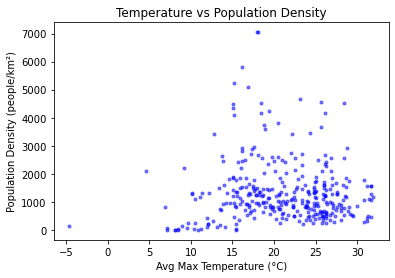

In [104]:
plt.plot(city['best_tmax'], city['population_density'], 'b.', alpha=0.5)
plt.title('Temperature vs Population Density')
plt.xlabel("Avg Max Temperature (\u00b0C)")
plt.ylabel("Population Density (people/km\u00b2)")
# plt.savefig('wikipedia.png')